In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import cv2

folder_path = r"C:\Users\mduma\OneDrive\Desktop\hacktropica\Lung_Cancer_Dataset_augmented\train\Corona Virus Disease"


sizes = []

for img_name in os.listdir(folder_path):
    img_path = os.path.join(folder_path ,img_name)
    img = cv2.imread(img_path)
    if img is not None:
        sizes.append(img.shape[:2])  # (height, width)

print(set(sizes))

{(567, 525), (187, 213), (195, 226), (195, 235), (178, 173), (241, 220), (1472, 1799), (176, 249), (885, 1036), (198, 249), (199, 214), (1655, 2000), (1270, 1292), (1453, 2051), (798, 906), (113, 138), (160, 231), (982, 1261), (300, 400), (169, 218), (575, 577), (1857, 2000), (215, 194), (1805, 2200), (1474, 1692), (225, 226), (1971, 2498), (154, 184), (155, 149), (173, 197), (256, 204), (194, 220), (194, 229), (1024, 1235), (195, 203), (176, 199), (183, 247), (1862, 1962), (179, 213), (120, 145), (180, 196), (198, 244), (1693, 2278), (164, 251), (200, 192), (192, 188), (109, 181), (98, 144), (201, 255), (153, 187), (184, 202), (847, 1040), (173, 183), (237, 195), (183, 224), (800, 955), (195, 216), (557, 541), (214, 229), (164, 210), (199, 186), (156, 215), (109, 140), (199, 204), (210, 204), (209, 245), (221, 210), (1402, 1401), (150, 186), (509, 613), (224, 224), (113, 146), (799, 842), (169, 199), (202, 196), (712, 972), (3368, 2800), (931, 998), (1538, 2493), (172, 204), (221, 246

### Data processing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",      #for x-ray use grayscale and for other image use rgb
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 6054 files belonging to 5 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",  #for x-ray use grayscale and for other image use rgb
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 2015 files belonging to 5 classes.


### Model Building



In [8]:
cnn=tf.keras.models.Sequential()

### Building Convunational Layer



In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\mduma\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=264,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=264,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [21]:
# cnn.add(tf.keras.layers.Conv2D(filters=1024,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,1]))
# cnn.add(tf.keras.layers.Conv2D(filters=1024,kernel_size=3,activation='relu'))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [23]:
cnn.add(tf.keras.layers.Dropout(0.3))

In [25]:
cnn.add(tf.keras.layers.Flatten())


In [27]:
cnn.add(tf.keras.layers.Dense(516, activation='relu'))   

In [29]:
cnn.add(tf.keras.layers.Dropout(0.4))  # Dropout to prevent overfitting

In [31]:
cnn.add(tf.keras.layers.Dense(5, activation='softmax'))

In [33]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 264)    │       304,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 264)    │       627,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 264)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,217,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 516)            │     1,057,284 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 516)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,855,629 (22.34 MB)

 Trainable params: 5,855,629 (22.34 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.2482 - loss: 2.1329 - val_accuracy: 0.4258 - val_loss: 1.3222
Epoch 2/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 181s 949ms/step - accuracy: 0.4837 - loss: 1.1461 - val_accuracy: 0.5901 - val_loss: 0.8794
Epoch 3/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 184s 963ms/step - accuracy: 0.6095 - loss: 1.0523 - val_accuracy: 0.6243 - val_loss: 0.8773
Epoch 4/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 181s 949ms/step - accuracy: 0.6153 - loss: 0.9015 - val_accuracy: 0.6710 - val_loss: 0.7762
Epoch 5/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 469s 2s/step - accuracy: 0.6680 - loss: 0.8010 - val_accuracy: 0.6918 - val_loss: 0.7189
Epoch 6/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 180s 944ms/step - accuracy: 0.6965 - loss: 0.7123 - val_accuracy: 0.6983 - val_loss: 0.6926
Epoch 7/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 187s 979ms/step - accuracy: 0.7200 - loss: 0.6621 - val_accuracy: 0.7156 - val_loss: 0.6606
Epoch 8/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 185s 973ms/step - accuracy: 0.7438 - loss:

In [37]:
# Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

190/190 ━━━━━━━━━━━━━━━━━━━━ 40s 210ms/step - accuracy: 0.8025 - loss: 0.4506
Training accuracy: 0.8075652718544006


In [41]:
#Validation set Accuracy
validation_loss, validation_acc = cnn.evaluate(validation_set)
print('validation accuracy:', validation_acc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 194ms/step - accuracy: 0.7384 - loss: 0.6207
validation accuracy: 0.7488833665847778


In [43]:
cnn.save('trained_lungs_cancer_disease_model.keras')

In [45]:
training_history.history

{'accuracy': [0.3031053841114044,
  0.5252725481987,
  0.608688473701477,
  0.6182689070701599,
  0.665840744972229,
  0.6954079866409302,
  0.7135778069496155,
  0.7419887781143188,
  0.7476049065589905,
  0.7611496448516846],
 'loss': [1.628190040588379,
  1.069617509841919,
  1.5035905838012695,
  0.8834150433540344,
  0.8044710159301758,
  0.7152304649353027,
  0.6639009714126587,
  0.6160210967063904,
  0.5978503227233887,
  0.5720585584640503],
 'val_accuracy': [0.42580646276474,
  0.5900744199752808,
  0.6243176460266113,
  0.6709677577018738,
  0.6918114423751831,
  0.6982630491256714,
  0.7156327366828918,
  0.7285360097885132,
  0.7166253328323364,
  0.7488833665847778],
 'val_loss': [1.3221817016601562,
  0.8794422149658203,
  0.8773379325866699,
  0.7761989831924438,
  0.7188860774040222,
  0.6926159262657166,
  0.660554826259613,
  0.654272735118866,
  0.6660698652267456,
  0.6126244068145752]}

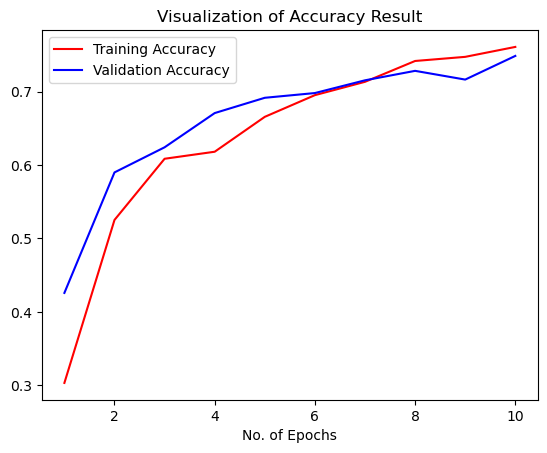

In [47]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [49]:
class_name = validation_set.class_names

In [57]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2015 files belonging to 5 classes.


In [59]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1) 

2015/2015 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step


In [61]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(2015,), dtype=int64, numpy=array([0, 0, 0, ..., 4, 4, 4], dtype=int64)>

In [63]:
predicted_categories

<tf.Tensor: shape=(2015,), dtype=int64, numpy=array([0, 0, 0, ..., 1, 4, 4], dtype=int64)>

In [65]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [67]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                      precision    recall  f1-score   support

 Bacterial Pneumonia       0.72      0.55      0.63       401
Corona Virus Disease       0.85      0.83      0.84       406
              Normal       0.80      0.84      0.82       401
        Tuberculosis       0.79      0.90      0.84       406
     Viral Pneumonia       0.58      0.62      0.60       401

            accuracy                           0.75      2015
           macro avg       0.75      0.75      0.75      2015
        weighted avg       0.75      0.75      0.75      2015



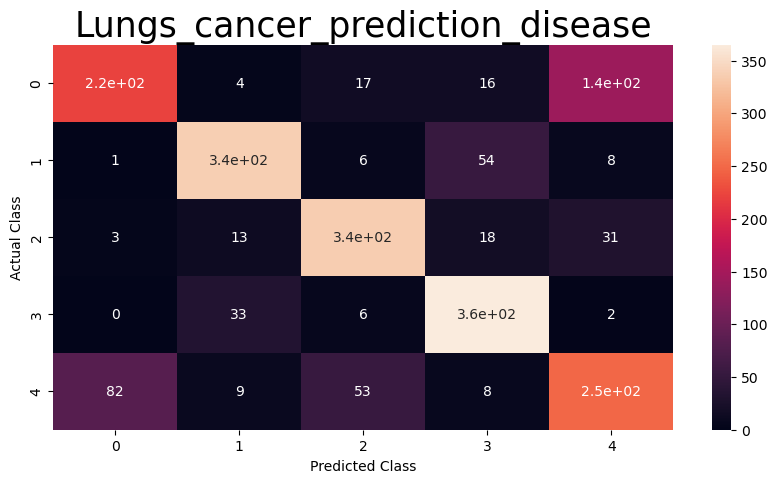

In [73]:
plt.figure(figsize=(10, 5))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 10)
plt.ylabel('Actual Class',fontsize = 10)
plt.title('Lungs_cancer_prediction_disease',fontsize = 25)
plt.show()